In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [5]:
df_raw = pd.read_csv('../Data/walmart_cleaned.csv')
df_raw.drop('Unnamed: 0', axis=1, inplace=True)
df_raw.head(5)

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [6]:
df_raw.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


Convert Unemployment into low, medium and high categories which are then made into a binary vector

Umemployment is also used to demonstrate quartile binning, here we use 10 quartiles

In [43]:
cat_labels = ['low', 'medium', 'high']
unemp_cat = pd.cut(df_raw['Unemployment'], 3, labels=cat_labels)

quant_labels = [f'q{i}' for i in range(1, 11)]
unemp_quant = pd.qcut(df_raw['Unemployment'], 10, labels=quant_labels)


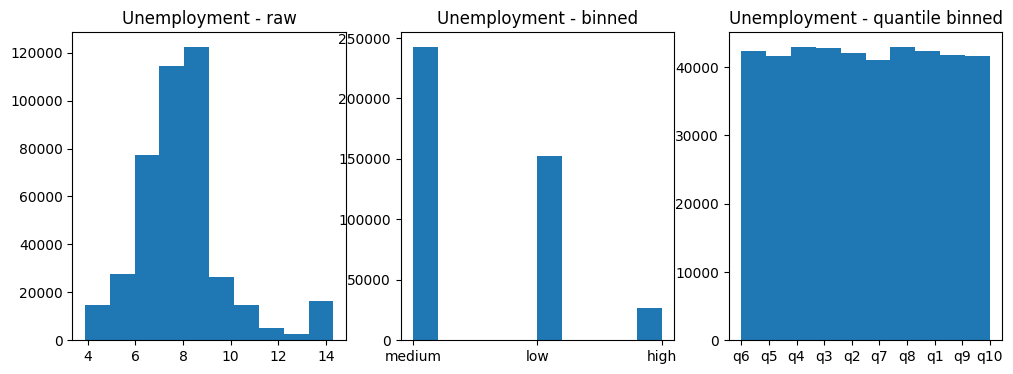

In [44]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 4))

ax1.hist(df_raw['Unemployment'])
ax1.set_title('Unemployment - raw')

ax2.hist(unemp_cat)
ax2.set_title('Unemployment - binned')

ax3.hist(unemp_quant)
ax3.set_title('Unemployment - quantile binned')

fig.show()

In [45]:
unemp_cat_vector = LabelBinarizer().fit_transform(unemp_cat)
unemp_quant_vector = LabelBinarizer().fit_transform(unemp_quant)

print(f'Binning: {unemp_cat_vector[:5]}\nQuantile Bucket: {unemp_quant_vector[:5]}')

Binning: [[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
Quantile Bucket: [[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


In [54]:
n_rows = df_raw.shape[0]
dept_counts = df_raw.groupby('Dept').agg(count=('Store', 'count')).sort_values(by='count', ascending=False)